<a href="https://colab.research.google.com/github/Yasika1225/netflix-data-visualization-2/blob/main/python_internals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving netflix1.csv to netflix1 (1).csv
File loaded successfully!

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
None

First 5 Rows:
  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Sho

/tmp/ipython-input-3909610042.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-3909610042.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

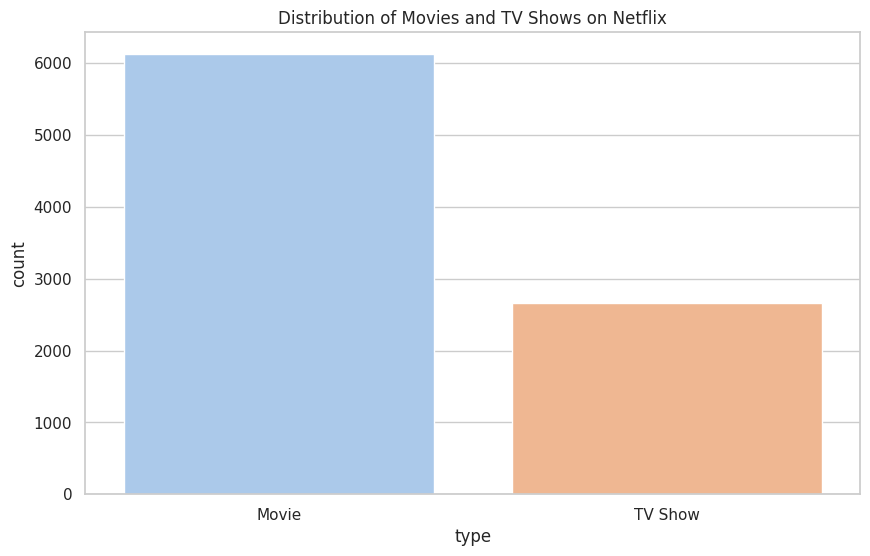

/tmp/ipython-input-3909610042.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


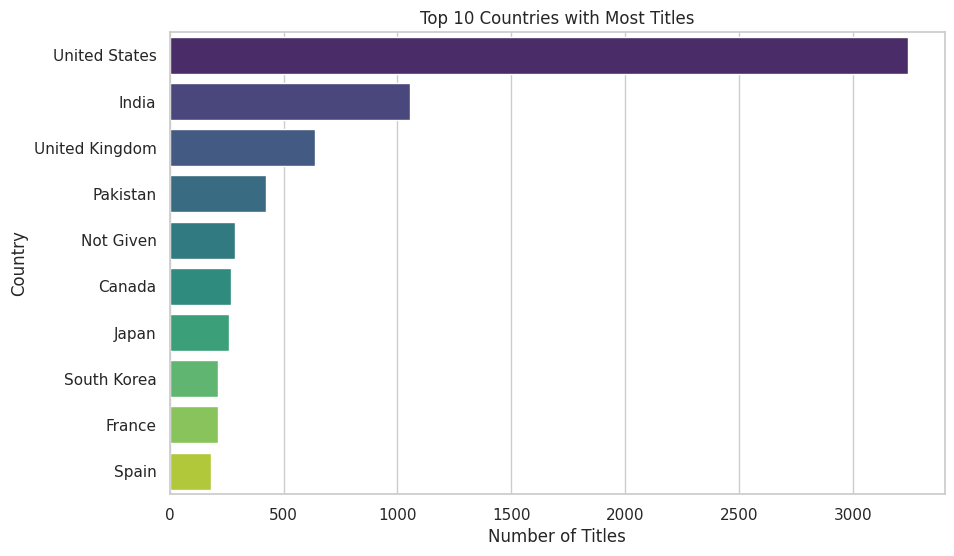

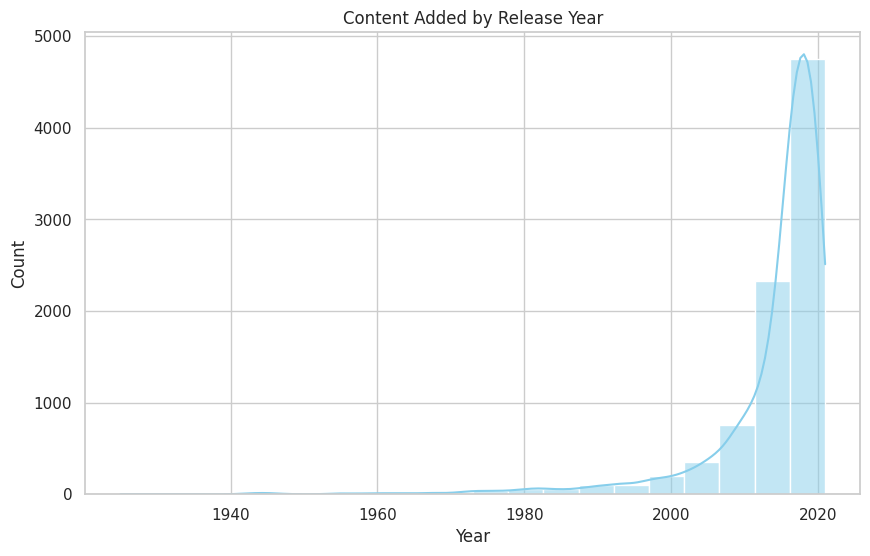

/tmp/ipython-input-3909610042.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['rating'], order=df['rating'].value_counts().index, palette='cool')


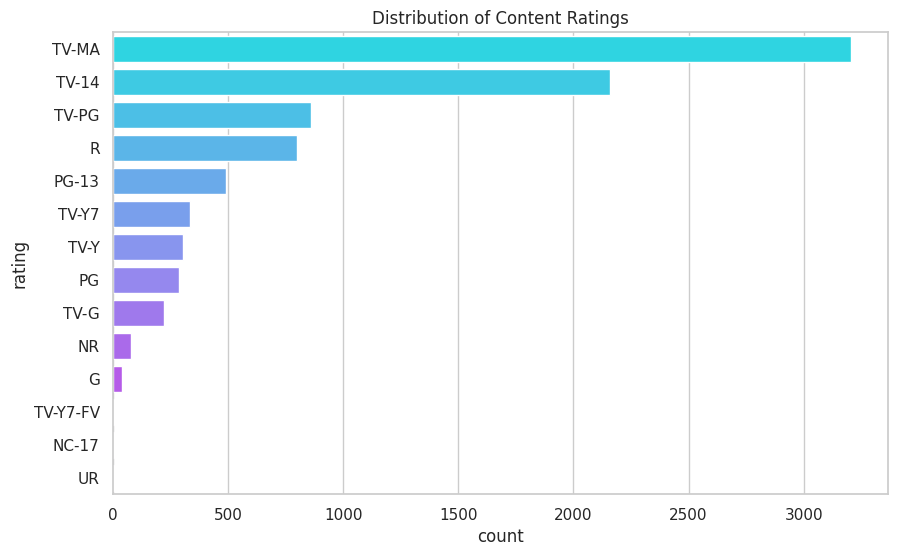

/tmp/ipython-input-3909610042.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='mako')


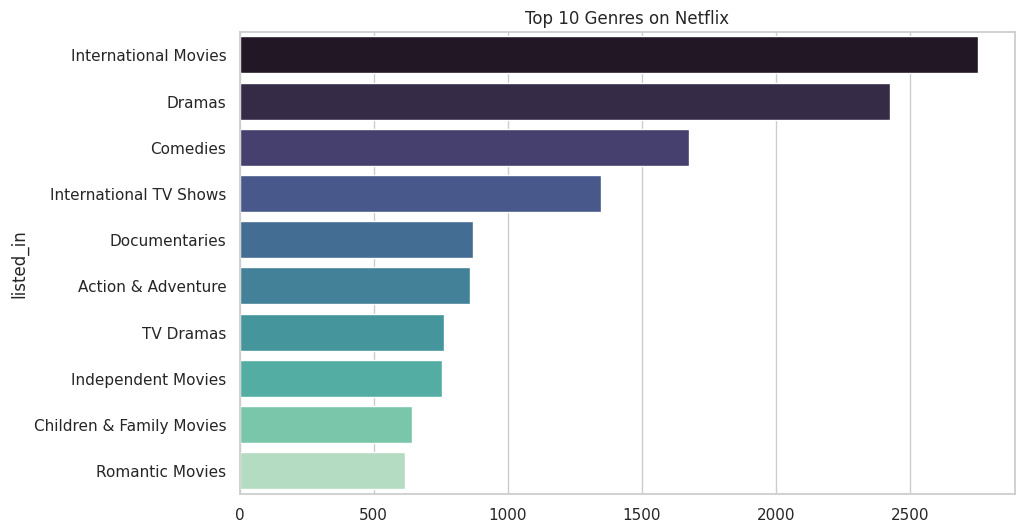


 Cleaned data saved as 'netflix1_cleaned.csv'


In [5]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


file_path = "netflix1.csv"

if not os.path.exists(file_path):
    print(" File not found! Please upload the CSV file first.")
    print(" If you're using Google Colab, run this command first:")
    print("   from google.colab import files")
    print("   uploaded = files.upload()  # Then choose netflix1.csv from your system")
else:

    df = pd.read_csv(file_path)
    print("File loaded successfully!\n")


    print("Dataset Info:")
    print(df.info())

    print("\nFirst 5 Rows:")
    print(df.head())


    print("\nMissing Values:")
    print(df.isnull().sum())


    df.drop_duplicates(inplace=True)


    for col in df.select_dtypes(include='object').columns:
        df[col].fillna(df[col].mode()[0], inplace=True)


    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        df[col].fillna(df[col].median(), inplace=True)

    print("\n After Cleaning:")
    print(df.isnull().sum())


    print("\nTotal Titles:", df.shape[0])
    print(" Columns:", list(df.columns))

    if 'type' in df.columns:
        print("\nType Counts:")
        print(df['type'].value_counts())

    if 'type' in df.columns:
        sns.countplot(data=df, x='type', palette='pastel')
        plt.title("Distribution of Movies and TV Shows on Netflix")
        plt.show()


    if 'country' in df.columns:
        top_countries = df['country'].value_counts().head(10)
        sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
        plt.title("Top 10 Countries with Most Titles")
        plt.xlabel("Number of Titles")
        plt.ylabel("Country")
        plt.show()


    if 'release_year' in df.columns:
        df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
        sns.histplot(df['release_year'], bins=20, kde=True, color='skyblue')
        plt.title("Content Added by Release Year")
        plt.xlabel("Year")
        plt.ylabel("Count")
        plt.show()


    if 'rating' in df.columns:
        sns.countplot(y=df['rating'], order=df['rating'].value_counts().index, palette='cool')
        plt.title("Distribution of Content Ratings")
        plt.show()


    if 'listed_in' in df.columns:
        genres = df['listed_in'].str.split(',').explode().str.strip()
        top_genres = genres.value_counts().head(10)
        sns.barplot(x=top_genres.values, y=top_genres.index, palette='mako')
        plt.title("Top 10 Genres on Netflix")
        plt.show()

    df.to_csv("netflix1_cleaned.csv", index=False)
    print("\n Cleaned data saved as 'netflix1_cleaned.csv'")
